In [1]:
import torch

from torchvision import datasets, transforms

from torch import nn
from torch import optim

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

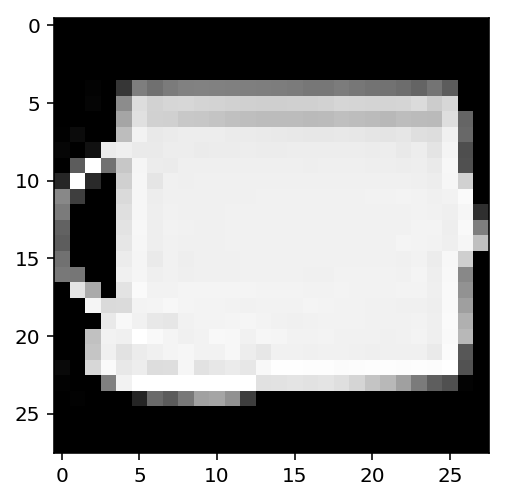

In [3]:
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [4]:
images.shape

torch.Size([64, 1, 28, 28])

### Define model architecture

In [5]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        images = images.view(images.shape[0], -1)
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss+=loss.item()
    
    else:
        print("The training loss for {}/{} epoch \
              is: {}".format(e+1, epochs, running_loss/len(trainloader)))

The training loss for 1/5 epoch               is: 0.5660674661111984
The training loss for 2/5 epoch               is: 0.46509353192185543
The training loss for 3/5 epoch               is: 0.42617058804802804
The training loss for 4/5 epoch               is: 0.4100756422400093
The training loss for 5/5 epoch               is: 0.40258554727442736


In [7]:
import utils

<Figure size 432x288 with 0 Axes>

/Users/rachitjain/anaconda3/lib/python3.6/site-packages/torch/tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


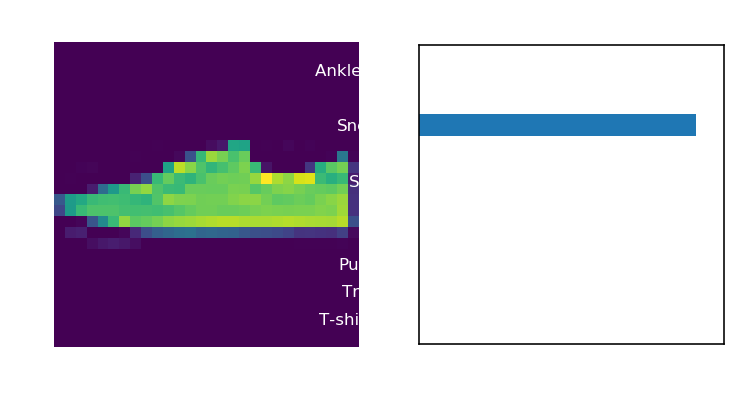

In [8]:
## Checking effectiveness of model
images, labels = next(iter(trainloader))

image = images[0].view(1, -1)

with torch.no_grad():
    logps = model(image)
    
ps = torch.exp(logps)

utils.view_classify(image.resize(1,28,28), ps, version='Fashion')